<a href="https://colab.research.google.com/github/TNaingHtwe/GraSPP-25S-climatechange/blob/main/notebooks/20250525_Disaster_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EM-DAT Data**

Data source https://public.emdat.be/


In [15]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [16]:
#Created a fork and cloned data from repo to use
!git clone https://github.com/TNaingHtwe/GraSPP-25S-climatechange.git
# Load the data from the cloned repo
df = pd.read_excel('GraSPP-25S-climatechange/data/raw/public_emdat_custom_request_2025-05-06_fbc8ee61-93e5-46cb-b9a2-492c362b1411.xlsx')

df["Entry Date"] = pd.to_datetime(df["Entry Date"], errors='coerce')
df["Year"] = df["Entry Date"].dt.year

# Preview
df.head()

fatal: destination path 'GraSPP-25S-climatechange' already exists and is not an empty directory.


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year
0,2005-0002-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
1,2005-0003-BRA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,BRA,...,NaN,NaN,NaN,NaN,NaN,64.09274,"[{""adm2_code"":10760,""adm2_name"":""Criciuma""}]",2005-01-06,2023-09-25,2005
2,2005-0005-IRN,No,tec-mis-exp-exp,Technological,Miscellaneous accident,Explosion (Miscellaneous),Explosion (Miscellaneous),NaN,Appartment,IRN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
3,2005-0007-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
4,2005-0008-ITA,No,tec-tra-rai-rai,Technological,Transport,Rail,Rail,NaN,NaN,ITA,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-03-28,2023-09-25,2005


Add a new column Region to group the countries.

In [3]:
# Tag EU and other important countries
eu_countries = [ "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia",
                 "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia",
                 "Lithuania", "Luxembourg", "Malta", "Netherlands (Kingdom of the)", "Poland", "Portugal",
                 "Romania", "Slovakia", "Slovenia", "Spain", "Sweden" ]
other_countries = [
    "China", "United States", "India", "Russian Federation", "Indonesia",
    "Brazil", "Japan", "Iran", "Canada",'Iran (Islamic Republic of)','United States of America'
]

# Assign 'Region' for logic
def assign_region(country):
    if country in eu_countries:
        return "Europe"
    elif country in ["United States", "United States of America", "Canada", "Brazil"]:
        return "Americas"
    elif country in ["China", "India", "Japan", "Indonesia", "Iran", "Iran (Islamic Republic of)"]:
        return "Asia"
    else:
        return "Other"

df["Region"] = df["Country"].apply(assign_region)


Checking unnesscesary columns and filtering for natural disaster related!!!

In [4]:
print(df.columns.tolist())
df.info()

#Checking data related to disaster
print("Disaster Group:")
print(df["Disaster Group"].unique())

print("\nDisaster Subgroup:")
print(df["Disaster Subgroup"].unique())

print("\nDisaster Type:")
print(df["Disaster Type"].unique())

print("\nDisaster Subtype:")
print(df["Disaster Subtype"].unique())


['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update', 'Year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4219 entries, 0 to 4218
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype         
-

Filtering for Natural Disaster Related

In [5]:
#Filtering out the natural disaster
climate_subgroups = ["Meteorological", "Hydrological", "Climatological"]
df_climate = df[
    (df["Disaster Group"] == "Natural") &
    (df["Disaster Subgroup"].isin(["Meteorological", "Hydrological", "Climatological"]))
].copy()

df_climate["Total Damage (Million USD)"] = (
    df_climate["Total Damage, Adjusted ('000 US$)"] / 1000
)

df_climate.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year,Total Damage (Million USD)
1,2005-0003-BRA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,BRA,...,NaN,NaN,NaN,NaN,64.09274,"[{""adm2_code"":10760,""adm2_name"":""Criciuma""}]",2005-01-06,2023-09-25,2005,NaN
6,2005-0011-DEU,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Erwin,DEU,...,200000.0,312048.0,270000.0,421265.0,64.09274,"[{""adm1_code"":1322,""adm1_name"":""Schleswig-Hols...",2007-02-21,2023-09-25,2007,421.265
7,2005-0011-DNK,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Erwin,DNK,...,900000.0,1404215.0,1300000.0,2028311.0,64.09274,"[{""adm1_code"":1077,""adm1_name"":""Aarhus""},{""adm...",2005-01-12,2023-09-25,2005,2028.311
8,2005-0011-EST,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Erwin,EST,...,26000.0,40566.0,130000.0,202831.0,64.09274,"[{""adm2_code"":16018,""adm2_name"":""Pärnu linn""}]",2005-01-12,2023-09-25,2005,202.831
9,2005-0011-IRL,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Erwin,IRL,...,NaN,NaN,NaN,NaN,64.09274,"[{""adm1_code"":1587,""adm1_name"":""Dublin""},{""adm...",2005-01-10,2023-09-25,2005,NaN


Disaster related to climate happened across the world

In [6]:
# Aggregate metrics using adjusted damage
summary = df_climate.groupby("Country").agg({
    "Total Deaths": "sum",
    "Total Affected": "sum",
    "Total Damage, Adjusted ('000 US$)": "sum"
}).reset_index()

# Add disaster count
summary["Disaster Count"] = df_climate.groupby("Country").size().values

# Convert to million USD
summary["Total Damage (Million USD)"] = summary["Total Damage, Adjusted ('000 US$)"] / 1000

summary["hover_text"] = (
    "Country: " + summary["Country"] +
    "<br>Disasters: " + summary["Disaster Count"].astype(str) +
    "<br>Total Deaths: " + summary["Total Deaths"].fillna(0).round().astype(int).astype(str) +
    "<br>Total Damage (Million USD): " + summary["Total Damage (Million USD)"].fillna(0).round(0).astype(int).astype(str)
)

summary["customdata"] = summary["hover_text"]



#Plotly Choropleth with Custom Hover

fig = px.choropleth(
    summary,
    locations="Country",
    locationmode="country names",
    color="Disaster Count",
    color_continuous_scale="Reds"
)

fig.update_traces(customdata=summary["customdata"], hovertemplate="%{customdata}<extra></extra>")
fig.update_layout(title="Climate-Related Disasters: Frequency, Deaths, and Damage")
fig.show()

Disaster count, death and damage by countries

<ipython-input-8-00664d7c0db2>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




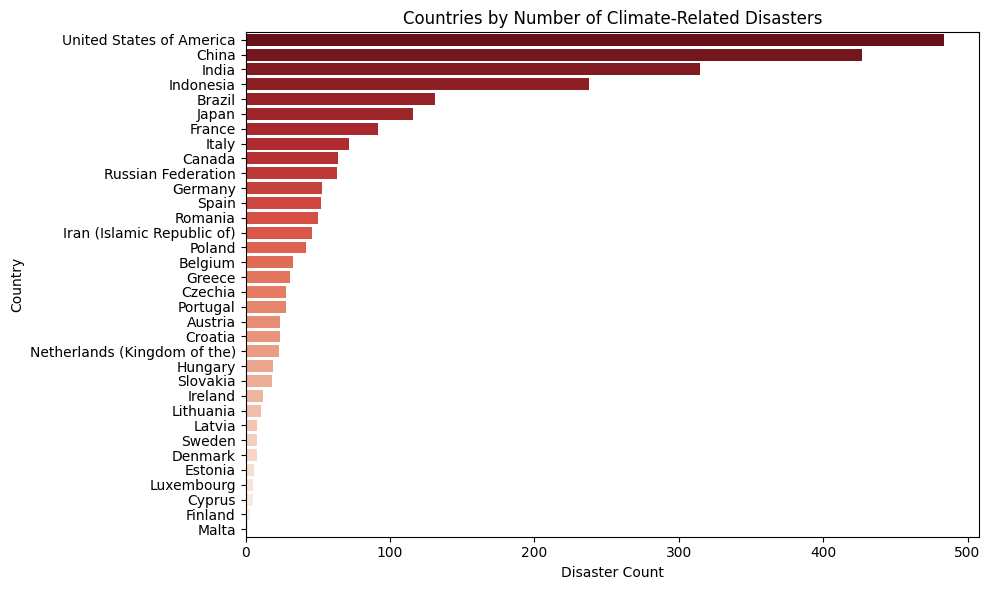

<ipython-input-8-00664d7c0db2>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




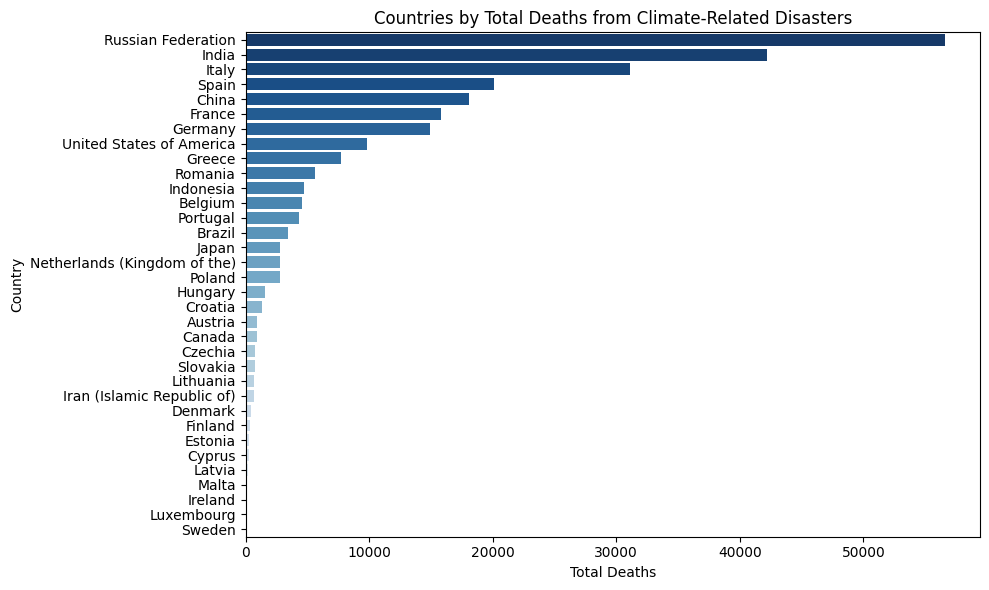

<ipython-input-8-00664d7c0db2>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




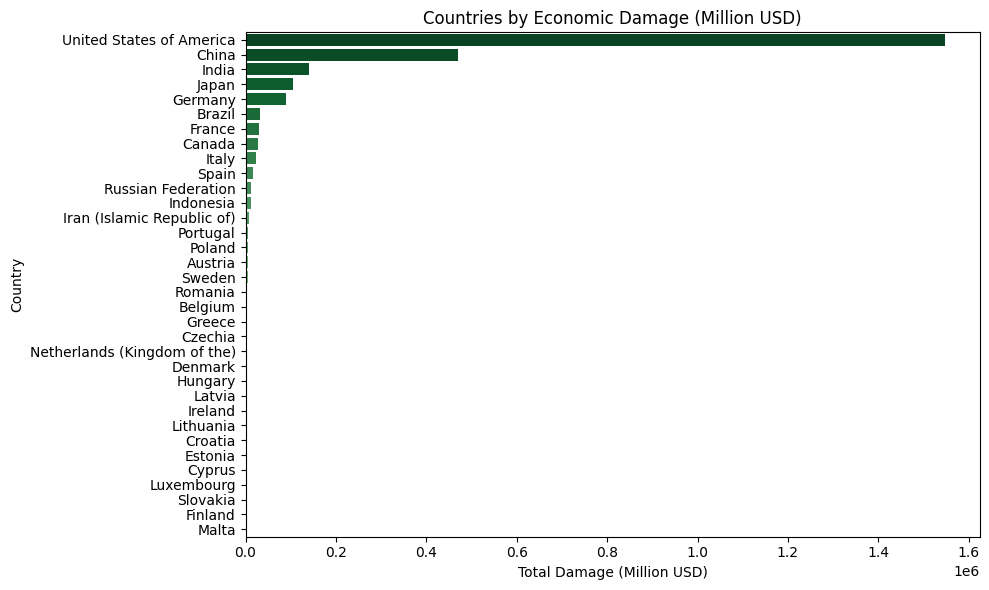

In [8]:
# Count Data

# Sort by count and take top 15
top_disasters = summary.sort_values("Disaster Count", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_disasters, x="Disaster Count", y="Country", palette="Reds_r")
plt.title("Countries by Number of Climate-Related Disasters")
plt.xlabel("Disaster Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Death Data
top_deaths = summary.sort_values("Total Deaths", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_deaths, x="Total Deaths", y="Country", palette="Blues_r")
plt.title("Countries by Total Deaths from Climate-Related Disasters")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# Damage Data
top_damage = summary.sort_values("Total Damage (Million USD)", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_damage, x="Total Damage (Million USD)", y="Country", palette="Greens_r")
plt.title("Countries by Economic Damage (Million USD)")
plt.xlabel("Total Damage (Million USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


Summary Statistics

In [9]:
print(f"Number of countries: {df_climate['Country'].nunique()}")
print(f"Time period: {df_climate['Year'].min()} to {df_climate['Year'].max()}")
print(f"Total number of disaster events: {len(df_climate)}")

df_climate[[
    "Total Deaths",
    "Total Affected",
    "Total Damage, Adjusted ('000 US$)"
]].describe().round(2).T

df_climate["Total Damage (Million USD)"] = df_climate["Total Damage, Adjusted ('000 US$)"] / 1000

df_climate[[
    "Total Deaths",
    "Total Affected",
    "Total Damage (Million USD)"
]].describe().round(2).T


Number of countries: 34
Time period: 2005 to 2025
Total number of disaster events: 2541


,count,mean,std,min,25%,50%,75%,max
Total Deaths,1996.0,128.78,1425.70,1.0,4.00,12.0,32.25,5.573600e+04
Total Affected,1725.0,1119448.01,10060740.66,1.0,394.00,4000.0,50650.00,3.300000e+08
Total Damage (Million USD),1127.0,2266.97,9066.28,0.7,125.38,438.8,1596.28,1.950299e+05


Scatterplot

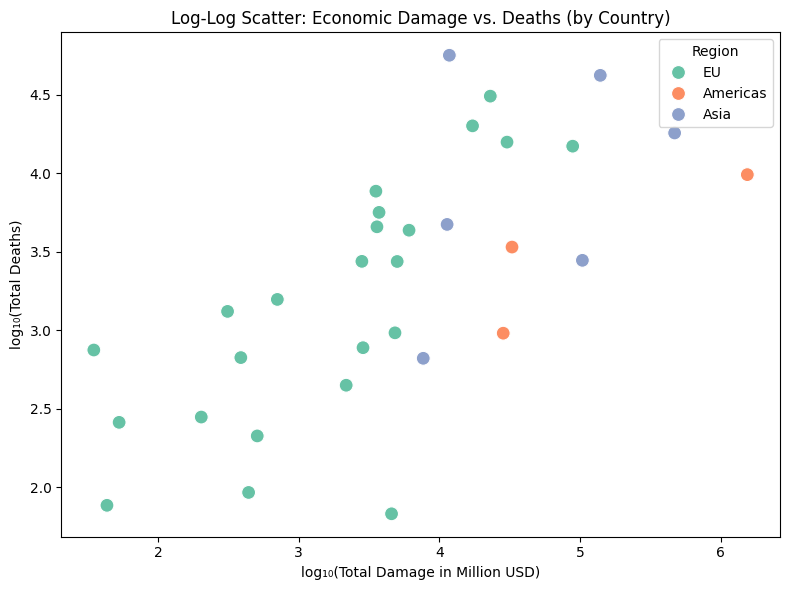

In [10]:
# Reuse your region classifier
def assign_region(country):
    if country in eu_countries:
        return "EU"
    elif country in other_countries:
        return "Americas" if country in ["United States of America", "Canada", "Brazil"] else "Asia"
    else:
        return "Other"

summary["Region"] = summary["Country"].apply(assign_region)

scatter_df = summary[
    (summary["Total Damage (Million USD)"] > 0) &
    (summary["Total Deaths"] > 0)
].copy()

scatter_df["log_damage"] = np.log10(scatter_df["Total Damage (Million USD)"])
scatter_df["log_deaths"] = np.log10(scatter_df["Total Deaths"])

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=scatter_df,
    x="log_damage",
    y="log_deaths",
    hue="Region",
    palette="Set2",
    s=100
)
plt.title("Log-Log Scatter: Economic Damage vs. Deaths (by Country)")
plt.xlabel("log₁₀(Total Damage in Million USD)")
plt.ylabel("log₁₀(Total Deaths)")
plt.tight_layout()
plt.show()



Time series of Total Damage by Region

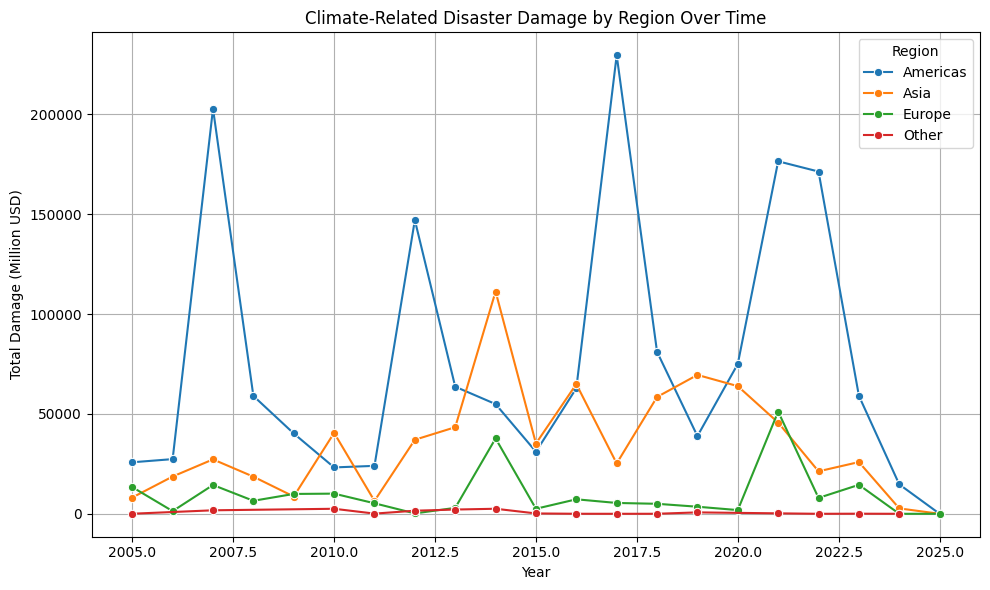

In [11]:
region_ts = df_climate.groupby(["Year", "Region"])["Total Damage (Million USD)"].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=region_ts, x="Year", y="Total Damage (Million USD)", hue="Region", marker="o")

plt.title("Climate-Related Disaster Damage by Region Over Time")
plt.xlabel("Year")
plt.ylabel("Total Damage (Million USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



Time series of Total Damage by Top 5 Countries

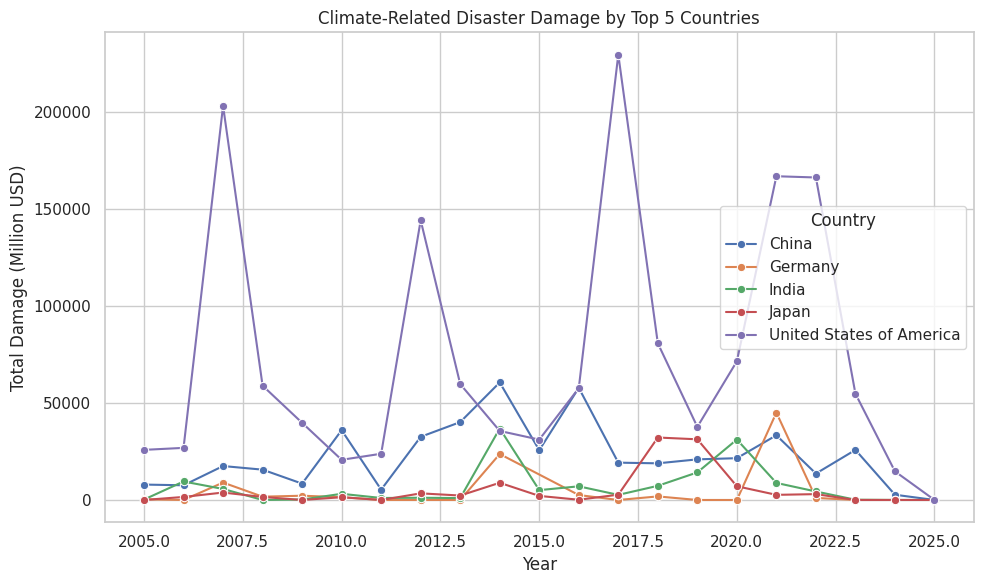

In [110]:
# Total damage by country (across all years)
top_damage_countries = df_climate.groupby("Country")["Total Damage (Million USD)"].sum()\
    .sort_values(ascending=False).head(5).index.tolist()
# Group yearly damage for selected countries
damage_top_countries = df_climate[df_climate["Country"].isin(top_damage_countries)]\
    .groupby(["Year", "Country"])["Total Damage (Million USD)"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=damage_top_countries, x="Year", y="Total Damage (Million USD)", hue="Country", marker="o")
plt.title("Climate-Related Disaster Damage by Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Total Damage (Million USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


Case Studies

In [13]:
# Top Damage Countries
df_climate.sort_values("Total Damage (Million USD)", ascending=False).head(5)[
    ["Country", "Year", "Disaster Type", "Disaster Subtype", "Total Damage (Million USD)", "Total Deaths"]
]

,Country,Year,Disaster Type,Disaster Subtype,Total Damage (Million USD),Total Deaths
185,United States of America,2007,Storm,Tropical cyclone,195029.889,1833.0
2776,United States of America,2017,Storm,Tropical cyclone,118091.963,88.0
3750,United States of America,2022,Storm,Tropical cyclone,104116.407,152.0
3530,United States of America,2021,Storm,Tropical cyclone,73091.612,96.0
2782,United States of America,2017,Storm,Tropical cyclone,70855.178,97.0


The United States overwhelmingly dominates the top five most expensive climate disasters, all involving tropical cyclones (hurricanes).

1. 2007 stands out with nearly $200 billion in damages and 1,833 deaths, likely representing Hurricane Katrina’s aftermath or similar mega-events.

1. 2017 appears twice, representing multiple hurricanes-probably Harvey, Irma, and Maria causing over $188 billion combined.

1. Despite the large economic impact, the death tolls (besides 2007) remain
comparatively moderate, indicating strong infrastructure and disaster preparedness.



In [14]:
# Top Death Countries
df_climate.sort_values("Total Deaths", ascending=False).head(5)[
    ["Country", "Year", "Disaster Type", "Disaster Subtype", "Total Damage (Million USD)", "Total Deaths"]
]

,Country,Year,Disaster Type,Disaster Subtype,Total Damage (Million USD),Total Deaths
1360,Russian Federation,2010,Extreme temperature,Heat wave,558.943,55736.0
3717,Italy,2023,Extreme temperature,Heat wave,NaN,18010.0
3904,Italy,2023,Extreme temperature,Heat wave,NaN,12743.0
3709,Spain,2022,Extreme temperature,Heat wave,NaN,11324.0
3896,Spain,2023,Extreme temperature,Heat wave,NaN,8352.0


1. The deadliest climate disaster in the dataset occurred in Russia (2010) with a heatwave killing over 55,000 people — the single largest loss of life from a climate-related event.

2. In 2023, a cluster of extreme heat events in Italy and Spain caused massive
fatalities (8k–18k), although economic damages were not recorded (NaN). This suggests that heatwaves, while less visible in economic metrics, are profoundly lethal, especially in aging or vulnerable populations.

These findings highlight how economic damage and human death tolls don’t always align: the US suffers more financial loss, but countries like Russia and southern Europe suffer more in human terms.

Regression

In [ ]:
# Copy the summary for regression
reg_df = summary.copy()

# Drop rows with missing values
# Filter rows where any of the predictors or response is <= 0
reg_df = reg_df[(reg_df[["Total Damage (Million USD)", "Disaster Count", "Total Deaths", "Total Affected"]] > 0).all(axis=1)]

# Now apply log transformation
reg_df["log_damage"] = np.log10(reg_df["Total Damage (Million USD)"])
reg_df["log_count"] = np.log10(reg_df["Disaster Count"])
reg_df["log_deaths"] = np.log10(reg_df["Total Deaths"])
reg_df["log_affected"] = np.log10(reg_df["Total Affected"])


# Define predictors (X) and response (y)
X = reg_df[["log_count", "log_deaths", "log_affected"]]
X = sm.add_constant(X)
y = reg_df["log_damage"]

model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:             log_damage   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     29.18
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.27e-08
Time:                        01:10:36   Log-Likelihood:                -24.623
No. Observations:                  31   AIC:                             57.25
Df Residuals:                      27   BIC:                             62.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8389      0.450      1.863   

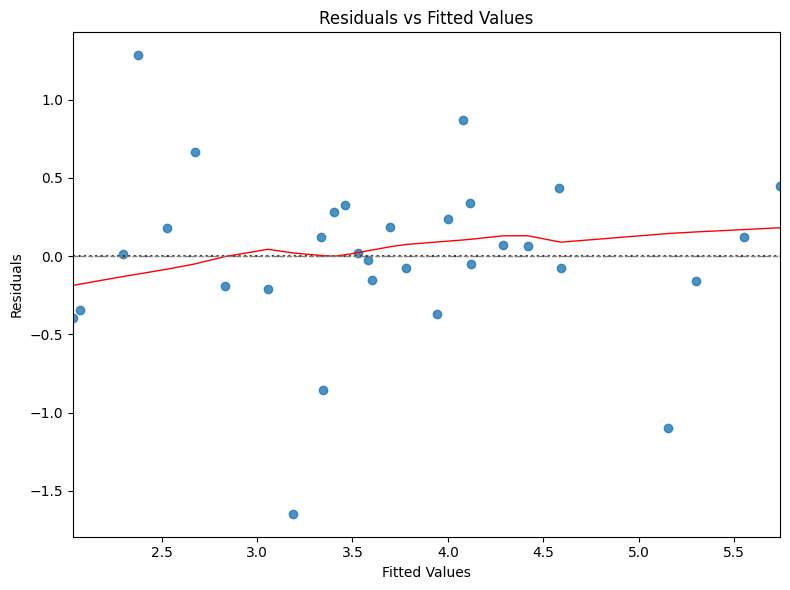

In [ ]:
# Get fitted values and residuals
fitted_vals = model.fittedvalues
residuals = model.resid

# Plot: Residuals vs Fitted
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.axhline(0, color='gray', linestyle='--', lw=1)
plt.tight_layout()
plt.show()


Importing GHG Dataset

In [20]:
from google.colab import files
uploaded = files.upload()

Saving EDGAR_2024_GHG_booklet_2024.xlsx to EDGAR_2024_GHG_booklet_2024.xlsx


In [23]:
df_ghg = pd.read_csv("edgar_ghg_emission_processed.csv")
df_ghg.head()

,Unnamed: 0,Country,Year,Emission (MtCO2eq/yr)
0,0,GLOBAL TOTAL,2014-01-01,48930.176837
1,1,GLOBAL TOTAL,2015-01-01,48808.767176
2,2,GLOBAL TOTAL,2016-01-01,49058.441256
3,3,GLOBAL TOTAL,2017-01-01,49878.733809
4,4,GLOBAL TOTAL,2018-01-01,51026.627449


In [26]:
excel_file = 'EDGAR_2024_GHG_booklet_2024.xlsx'

# List all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print(sheet_names)

# Load a specific sheet
df_totals = pd.read_excel(excel_file, sheet_name='GHG_totals_by_country')
df_sector = pd.read_excel(excel_file, sheet_name='GHG_by_sector_and_country')
df_gdp = pd.read_excel(excel_file, sheet_name='GHG_per_GDP_by_country')
df_capita = pd.read_excel(excel_file, sheet_name='GHG_per_capita_by_country')
# Preview
print(df_totals.head())

['info', 'citations and references', 'GHG_totals_by_country', 'GHG_by_sector_and_country', 'GHG_per_GDP_by_country', 'GHG_per_capita_by_country', 'LULUCF_macroregions']
  EDGAR Country Code                 Country        1970        1971  \
0                ABW                   Aruba    0.036713    0.041538   
1                AFG             Afghanistan   15.437430   15.364077   
2                AGO                  Angola   18.998763   18.866057   
3                AIA                Anguilla    0.003355    0.003396   
4                AIR  International Aviation  172.478021  172.465452   

         1972        1973        1974        1975        1976        1977  \
0    0.052391    0.057360    0.056630    0.070743    0.069793    0.080624   
1   13.316628   13.934875   15.177862   15.843058   15.943325   16.088215   
2   21.459002   23.018941   23.685423   22.519608   18.586243   23.251029   
3    0.003534    0.003411    0.003694    0.003968    0.003833    0.003960   
4  182.459819

In [28]:
# Print unique country names from the disaster dataset
print("Disaster Dataset Countries:")
print(df["Country"].dropna().unique())

# Print unique country names from the GHG emission dataset
print("\nGHG Dataset Countries:")
print(df_totals["Country"].dropna().unique())

print("\nGHG Dataset Countries:")
print(df_ghg["Country"].dropna().unique())

Disaster Dataset Countries:
['China' 'Brazil' 'Iran (Islamic Republic of)' 'Italy'
 'United States of America' 'Germany' 'Denmark' 'Estonia' 'Ireland'
 'Lithuania' 'Latvia' 'Netherlands (Kingdom of the)' 'Poland'
 'Russian Federation' 'Sweden' 'India' 'Indonesia' 'Czechia' 'Croatia'
 'Hungary' 'Romania' 'Spain' 'Japan' 'Slovakia' 'France' 'Finland'
 'Austria' 'Portugal' 'Canada' 'Greece' 'Malta' 'Belgium' 'Cyprus'
 'Luxembourg']

GHG Dataset Countries:
['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'International Aviation'
 'Albania' 'Curaçao' 'United Arab Emirates' 'Argentina' 'Armenia'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia'
 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland and Liechtenstein'
 'Chile' 'China' 'Côte d’Ivoire' 'Cameroon'
 'Democratic Republic of the Congo'

Cleaning Disaster Data to Merge with GHG

In [40]:
df_disaster=summary
df_disaster.head(10)
df_disaster = df_disaster.drop(columns=["hover_text", "customdata"])
df_disaster.head()

,Country,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Disaster Count,Total Damage (Million USD),Region
0,Austria,966.0,4.179000e+03,4836453.0,24,4836.453,EU
1,Belgium,4574.0,1.059230e+05,3600731.0,33,3600.731,EU
2,Brazil,3399.0,5.491750e+07,32853225.0,131,32853.225,Americas
3,Canada,961.0,4.510850e+05,28451264.0,64,28451.264,Americas
4,China,18112.0,1.089552e+09,470639750.0,427,470639.750,Asia


In [85]:
# Step 1: Filter EU countries from the disaster dataset
df_eu = df_disaster[df_disaster["Region"] == "EU"]

# Step 2: Aggregate relevant numeric columns
cols_to_sum = ["Total Deaths", "Total Affected", "Total Damage, Adjusted ('000 US$)",
               "Disaster Count", "Total Damage (Million USD)"]
eu_aggregated = df_eu[cols_to_sum].sum()

# Step 3: Create a new DataFrame row representing EU aggregate
eu_row = pd.DataFrame([{
    "Country": "EU27",
    "Region": "EU",
    "Total Deaths": eu_aggregated["Total Deaths"],
    "Total Affected": eu_aggregated["Total Affected"],
    "Total Damage, Adjusted ('000 US$)": eu_aggregated["Total Damage, Adjusted ('000 US$)"],
    "Disaster Count": eu_aggregated["Disaster Count"],
    "Total Damage (Million USD)": eu_aggregated["Total Damage (Million USD)"]
}])

# Step 4: Append the EU row without removing existing countries
df_disaster_with_eu = pd.concat([df_disaster, eu_row], ignore_index=True)

df_disaster_with_eu.head()
# Rename countries to match GHG
country_rename_map = {
    "United States of America": "United States",
    "Iran (Islamic Republic of)": "Iran",
    "Russian Federation": "Russia",
    'Netherlands (Kingdom of the)': "Netherlands",
    "Italy" : "Italy, San Marino and the Holy See",
    "Spain" : "Spain and Andorra",
    "France": "France and Monaco"
}
df_disaster_with_eu["Country"] = df_disaster_with_eu["Country"].replace(country_rename_map)
print(df_disaster_with_eu["Country"].unique())
print("Total number of unique countries:", df_disaster_with_eu["Country"].nunique())

['Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France and Monaco' 'Germany'
 'Greece' 'Hungary' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Italy, San Marino and the Holy See' 'Japan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Malta' 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Russia'
 'Slovakia' 'Spain and Andorra' 'Sweden' 'United States' 'EU27']
Total number of unique countries: 35


Lets combine with GHG datasets

In [72]:
print("\nGHG Dataset Countries:")
print(df_totals["Country"].dropna().unique())


GHG Dataset Countries:
['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'International Aviation'
 'Albania' 'Curaçao' 'United Arab Emirates' 'Argentina' 'Armenia'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia'
 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland and Liechtenstein'
 'Chile' 'China' 'Côte d’Ivoire' 'Cameroon'
 'Democratic Republic of the Congo' 'Congo' 'Cook Islands' 'Colombia'
 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Cayman Islands' 'Cyprus'
 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic'
 'Algeria' 'Ecuador' 'Egypt' 'Eritrea' 'Western Sahara'
 'Spain and Andorra' 'Estonia' 'Ethiopia' 'Finland' 'Fiji'
 'Falkland Islands' 'France and Monaco' 'Faroes' 'Gabon' 'United Kingdom'
 'Georgia' 'Ghana' 'Gibraltar' 'Guinea' 'Guadeloupe' 'The Gambia'

In [86]:
#Filter by focus country
focus_countries = df_disaster_with_eu["Country"].unique()

# GHG filtered
df_totals_filtered = df_totals[df_totals["Country"].isin(focus_countries)]
df_sector_filtered = df_sector[df_sector["Country"].isin(focus_countries)]
df_gdp_filtered = df_gdp[df_gdp["Country"].isin(focus_countries)]
df_capita_filtered = df_capita[df_capita["Country"].isin(focus_countries)]

print("\nGHG Dataset Countries:")
print(df_totals_filtered["Country"].dropna().unique())
print("Total number of unique countries:", df_totals_filtered["Country"].nunique())





GHG Dataset Countries:
['Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Cyprus' 'Czechia'
 'Germany' 'Denmark' 'Spain and Andorra' 'Estonia' 'Finland'
 'France and Monaco' 'Greece' 'Croatia' 'Hungary' 'Indonesia' 'India'
 'Ireland' 'Iran' 'Italy, San Marino and the Holy See' 'Japan' 'Lithuania'
 'Luxembourg' 'Latvia' 'Malta' 'Netherlands' 'Poland' 'Portugal' 'Romania'
 'Russia' 'Slovakia' 'Sweden' 'United States' 'EU27']
Total number of unique countries: 35


Rename Back

In [89]:
# Rename Countries Again
country_rename_map_reverse = {
    "Italy, San Marino and the Holy See" : "Italy",
    "Spain and Andorra": "Spain",
    "France and Monaco":"France"
}

df_totals_filtered.loc[:, "Country"] = df_totals_filtered["Country"].replace(country_rename_map_reverse)
df_sector_filtered.loc[:, "Country"] = df_sector_filtered["Country"].replace(country_rename_map_reverse)
df_gdp_filtered .loc[:, "Country"] = df_gdp_filtered ["Country"].replace(country_rename_map_reverse)
df_capita_filtered.loc[:, "Country"] = df_capita_filtered["Country"].replace(country_rename_map_reverse)

# Check
print(df_totals_filtered["Country"].dropna().unique())
print("Total number of unique countries:", df_totals_filtered["Country"].nunique())


['Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Cyprus' 'Czechia'
 'Germany' 'Denmark' 'Spain' 'Estonia' 'Finland' 'France' 'Greece'
 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iran' 'Italy' 'Japan'
 'Lithuania' 'Luxembourg' 'Latvia' 'Malta' 'Netherlands' 'Poland'
 'Portugal' 'Romania' 'Russia' 'Slovakia' 'Sweden' 'United States' 'EU27']
Total number of unique countries: 35


In [91]:
df_disaster_with_eu["Country"] = df_disaster_with_eu["Country"].replace(country_rename_map_reverse)
print("\nDisaster Dataset Countries:")
print(df_disaster_with_eu["Country"].dropna().unique())
print("Total number of unique countries:", df_disaster_with_eu["Country"].nunique())


Disaster Dataset Countries:
['Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'India' 'Indonesia' 'Iran' 'Ireland' 'Italy' 'Japan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'Poland' 'Portugal'
 'Romania' 'Russia' 'Slovakia' 'Spain' 'Sweden' 'United States' 'EU27']
Total number of unique countries: 35


Total GHG plus Disaster

In [99]:
# Merge disaster data with GHG totals
df_combined_totals = pd.merge(
    df_disaster_with_eu,
    df_totals_filtered,
    on="Country",
    how="inner"  # or "left" if you want to keep all disaster countries
)

# Drop EDGAR country code
df_combined_totals = df_combined_totals.drop(columns=["EDGAR Country Code"])

# Drop year columns before 2005
year_columns_to_drop = [col for col in df_combined_totals.columns if str(col).isdigit() and int(col) < 2005]
df_combined_totals = df_combined_totals.drop(columns=year_columns_to_drop)

# Choose columns for GHG emissions (assuming they are years)
ghg_years = [col for col in df_combined_totals.columns if str(col).isdigit() and int(col) >= 2005]
df_combined_totals["Total GHG Emissions"] = df_combined_totals[ghg_years].sum(axis=1)


# Check result
df_combined_totals.head()

,Country,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Disaster Count,Total Damage (Million USD),Region,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total GHG Emissions
0,Austria,966.0,4.179000e+03,4836453.0,24.0,4836.453,EU,96.201541,93.767898,90.639007,...,82.168744,82.717423,85.163054,82.206921,83.457356,77.273354,80.724159,75.408469,72.921493,1601.295988
1,Belgium,4574.0,1.059230e+05,3600731.0,33.0,3600.731,EU,143.064575,139.567585,136.845675,...,126.734729,125.747107,123.728337,124.177973,123.713784,115.817716,119.752697,112.279668,106.370188,2414.807824
2,Brazil,3399.0,5.491750e+07,32853225.0,131.0,32853.225,Americas,1025.421472,1031.667931,1048.418030,...,1252.305273,1227.832451,1239.039910,1216.091322,1220.402716,1215.999147,1294.511465,1298.489355,1300.168867,22496.659621
3,Canada,961.0,4.510850e+05,28451264.0,64.0,28451.264,Americas,750.948366,748.210832,770.402321,...,755.905719,750.600882,770.476680,794.173713,788.007679,711.931324,728.267914,745.245079,747.678027,14224.626214
4,China,18112.0,1.089552e+09,470639750.0,427.0,470639.750,Asia,8191.085964,8976.539057,9577.682536,...,13118.895552,13105.715333,13362.318184,13955.693169,14275.531317,14497.898717,15175.619087,15159.641990,15943.986553,238096.497608


Lets see some Plots

In [103]:
# Removing outlier
# Filter out EU27
df_combined_totals = df_combined_totals[df_combined_totals["Country"] != "EU27"]

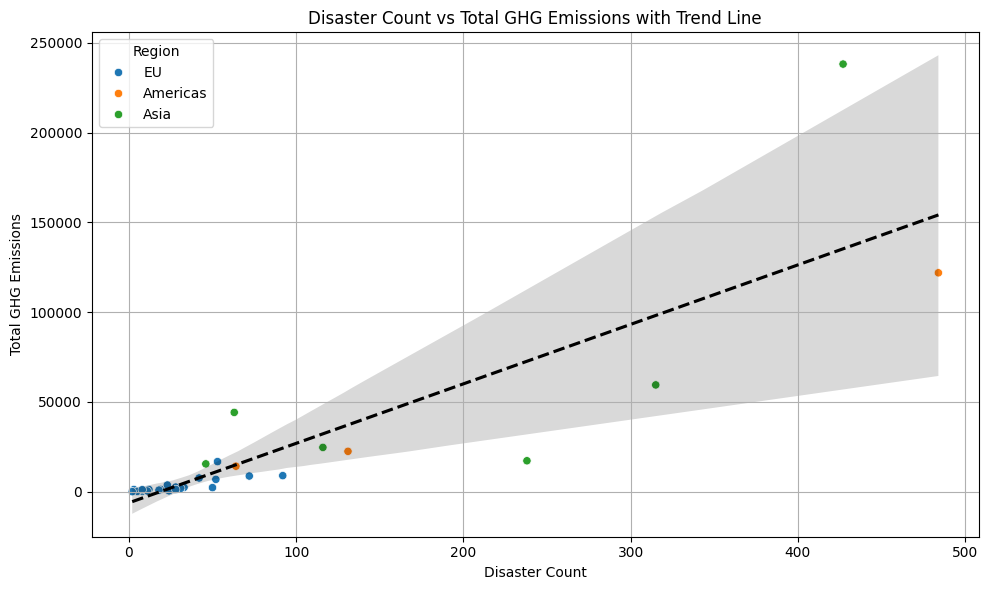

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined_totals, x="Disaster Count", y="Total GHG Emissions", hue="Region")
sns.regplot(data=df_combined_totals, x="Disaster Count", y="Total GHG Emissions", scatter=False, color='black', line_kws={"linestyle":"--"})
plt.title("Disaster Count vs Total GHG Emissions with Trend Line")
plt.grid(True)
plt.tight_layout()
plt.show()


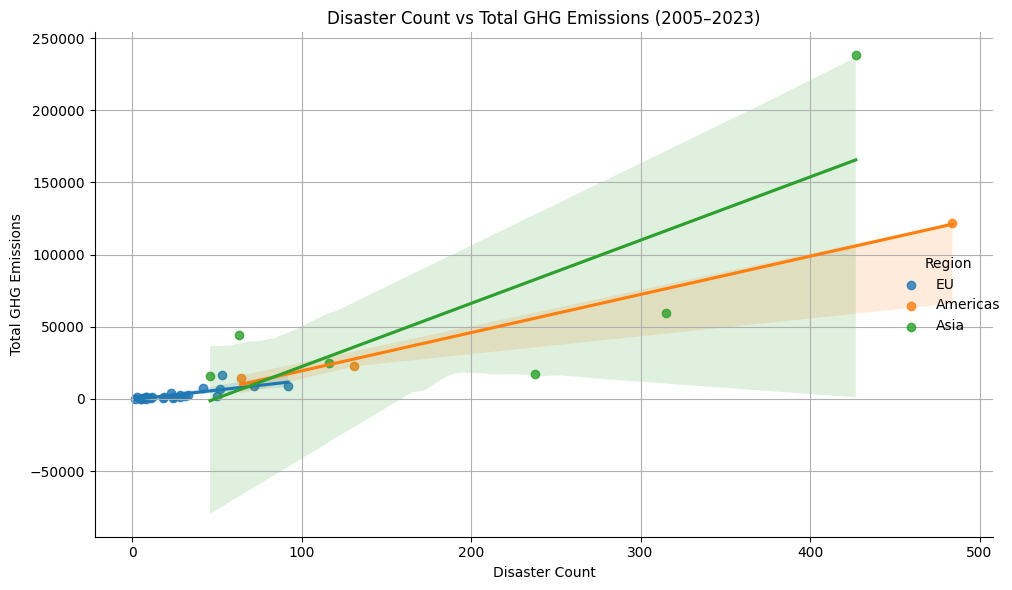

In [105]:
sns.lmplot(data=df_combined_totals, x="Disaster Count", y="Total GHG Emissions", hue="Region", height=6, aspect=1.5)
plt.title("Disaster Count vs Total GHG Emissions (2005–2023)")
plt.grid(True)
plt.tight_layout()
plt.show()

Overall trend, Asia is the most impacted by GHG and climate change.

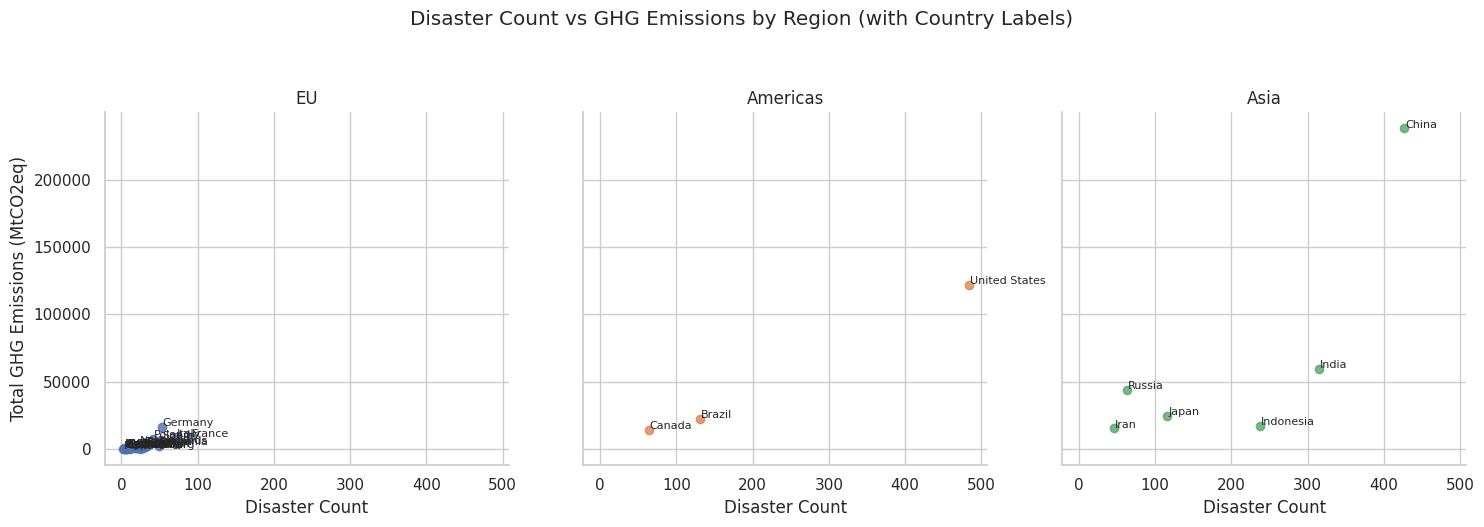

In [108]:
# Set figure style
sns.set(style="whitegrid")

# Create the facet plot by Region
g = sns.lmplot(
    data=df_combined_totals,
    x="Disaster Count",
    y="Total GHG Emissions",
    col="Region",      # Facet by region
    hue="Region",      # Color by region (optional here)
    fit_reg=False,     # Don't show regression lines now
    height=5,
    aspect=1
)

# Add country labels to each subplot
for ax, region in zip(g.axes.flat, df_combined_totals["Region"].unique()):
    subset = df_combined_totals[df_combined_totals["Region"] == region]
    for i, row in subset.iterrows():
        ax.text(row["Disaster Count"] + 1, row["Total GHG Emissions"] + 500,
                row["Country"], fontsize=8)

# Set titles and layout
g.set_titles("{col_name}")
g.set_axis_labels("Disaster Count", "Total GHG Emissions (MtCO2eq)")
plt.suptitle("Disaster Count vs GHG Emissions by Region (with Country Labels)", y=1.05)
plt.tight_layout()
plt.show()


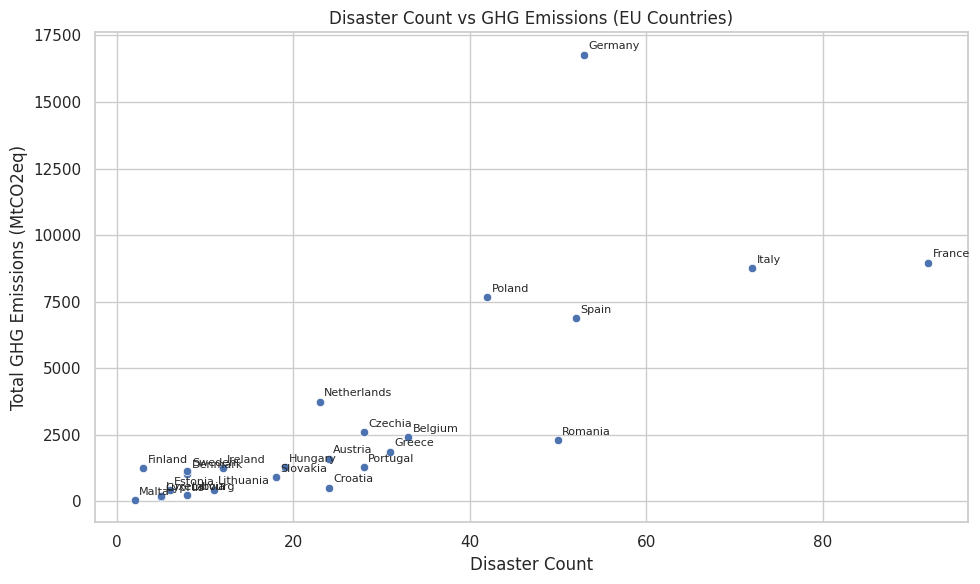

In [109]:
# Filter just EU countries
df_eu = df_combined_totals[df_combined_totals["Region"] == "EU"]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_eu, x="Disaster Count", y="Total GHG Emissions"
)

# Label countries
for i, row in df_eu.iterrows():
    plt.text(row["Disaster Count"] + 0.5, row["Total GHG Emissions"] + 200,
             row["Country"], fontsize=8)

plt.title("Disaster Count vs GHG Emissions (EU Countries)")
plt.xlabel("Disaster Count")
plt.ylabel("Total GHG Emissions (MtCO2eq)")
plt.tight_layout()
plt.show()


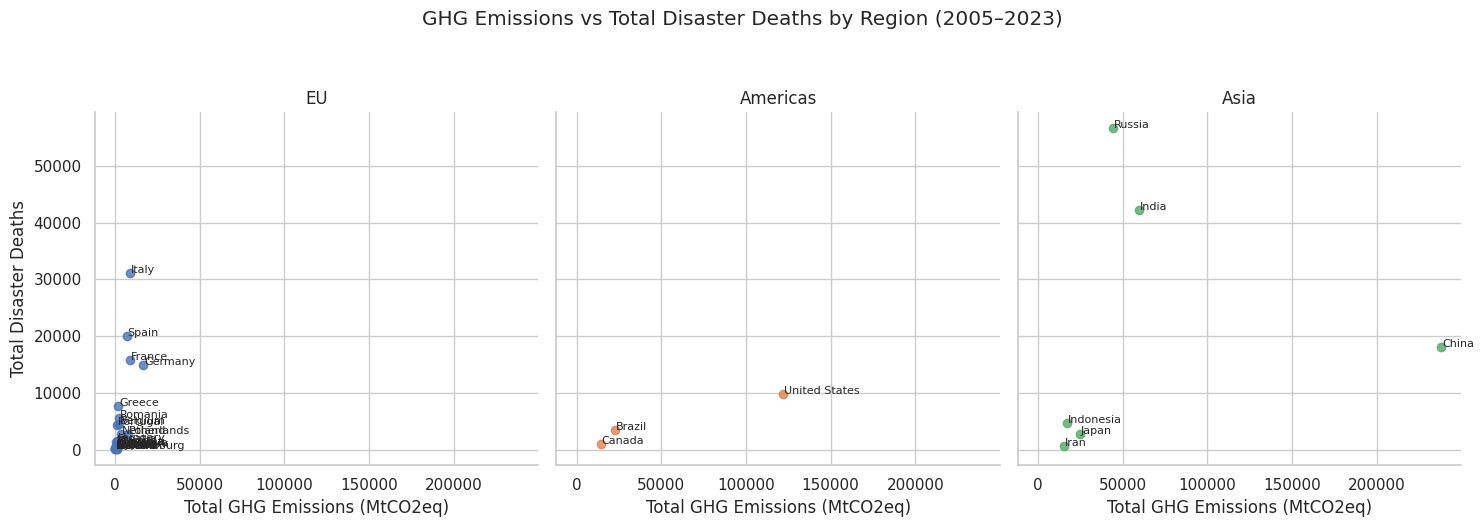

In [133]:
# Death by GHGs
sns.set(style="whitegrid")

# Create the facet plot by region
g = sns.lmplot(
    data=df_combined_totals,
    x="Total GHG Emissions",
    y="Total Deaths",
    col="Region",            # Facet by Region
    hue="Region",            # Optional for color
    fit_reg=False,           # Don't show regression lines
    height=5,
    aspect=1
)

# Add country labels
for ax, region in zip(g.axes.flat, df_combined_totals["Region"].unique()):
    subset = df_combined_totals[df_combined_totals["Region"] == region]
    for i, row in subset.iterrows():
        ax.text(row["Total GHG Emissions"] + 500, row["Total Deaths"], row["Country"], fontsize=8)

# Set axis labels and title
g.set_titles("{col_name}")
g.set_axis_labels("Total GHG Emissions (MtCO2eq)", "Total Disaster Deaths")
plt.suptitle("GHG Emissions vs Total Disaster Deaths by Region (2005–2023)", y=1.05)
plt.tight_layout()
plt.show()


So there is no direct connection to deaath by GHG.

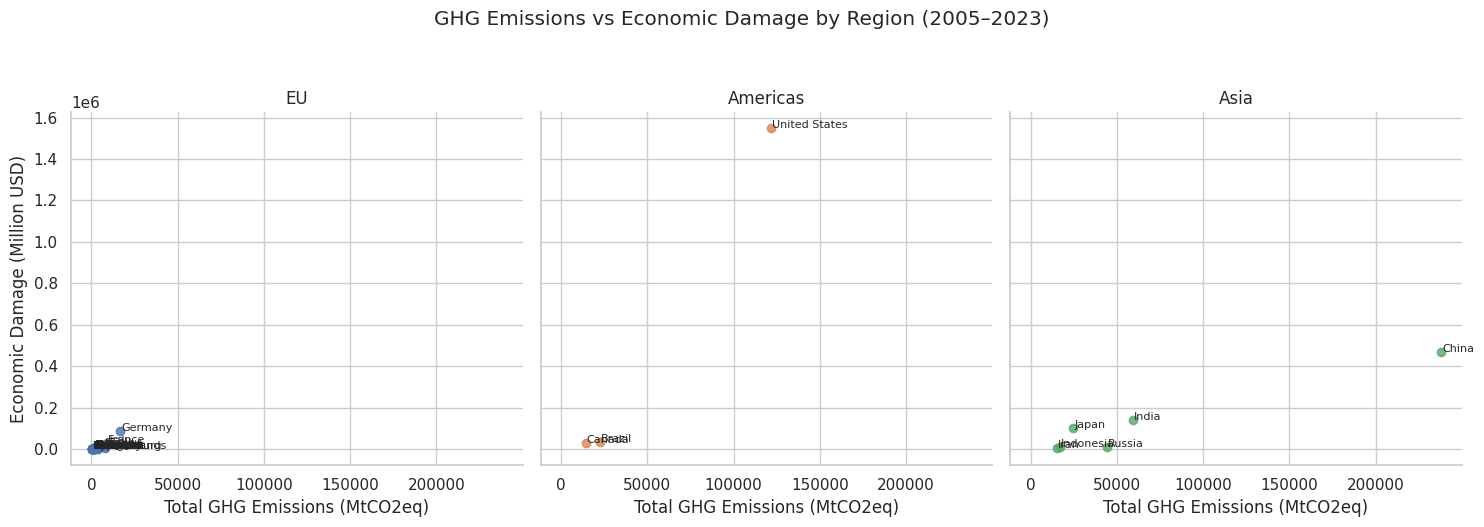

In [134]:
sns.set(style="whitegrid")

# Plot: GHG Emissions vs Economic Damage (faceted by Region)
g = sns.lmplot(
    data=df_combined_totals,
    x="Total GHG Emissions",
    y="Total Damage (Million USD)",
    col="Region",
    hue="Region",
    fit_reg=False,
    height=5,
    aspect=1
)

# Add country labels
for ax, region in zip(g.axes.flat, df_combined_totals["Region"].unique()):
    subset = df_combined_totals[df_combined_totals["Region"] == region]
    for i, row in subset.iterrows():
        ax.text(
            row["Total GHG Emissions"] + 500,
            row["Total Damage (Million USD)"] + 500,
            row["Country"],
            fontsize=8
        )

# Titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Total GHG Emissions (MtCO2eq)", "Economic Damage (Million USD)")
plt.suptitle("GHG Emissions vs Economic Damage by Region (2005–2023)", y=1.05)
plt.tight_layout()
plt.show()


### Preparing for Time series

In [116]:
country_rename_map_1 = {
    "United States of America": "United States",
    "Iran (Islamic Republic of)": "Iran",
    "Russian Federation": "Russia",
    'Netherlands (Kingdom of the)': "Netherlands",
}
df_climate["Country"] = df_climate["Country"].replace(country_rename_map_1)

df_climate

columns_to_keep = [
    "Country",
    "Year",
    "Disaster Type",
    "Total Deaths",
    "Total Affected",
    "Total Damage (Million USD)",
    "Total Damage, Adjusted ('000 US$)"
]

df_climate_cleaned = df_climate[columns_to_keep].copy()
df_climate_cleaned

,Country,Year,Disaster Type,Total Deaths,Total Affected,Total Damage (Million USD),"Total Damage, Adjusted ('000 US$)"
1,Brazil,2005,Storm,2.0,344.0,NaN,NaN
6,Germany,2007,Storm,2.0,2.0,421.265,421265.0
7,Denmark,2005,Storm,4.0,NaN,2028.311,2028311.0
8,Estonia,2005,Storm,NaN,100.0,202.831,202831.0
9,Ireland,2005,Storm,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4210,Croatia,2025,Flood,NaN,NaN,NaN,NaN
4213,United States,2025,Storm,7.0,196.0,NaN,NaN
4214,Indonesia,2025,Flood,10.0,6665.0,NaN,NaN
4215,United States,2025,Storm,23.0,995.0,NaN,NaN


In [125]:
df_total_ts_merge = pd.merge(
    df_climate_cleaned,
    df_totals_filtered,
    on="Country",
    how="inner"  # or "left" if you want to preserve all climate records
)
# Drop year columns before 2005
year_columns_to_drop = [col for col in df_total_ts_merge.columns if str(col).isdigit() and int(col) < 2005]
df_total_ts_merge = df_total_ts_merge.drop(columns=year_columns_to_drop)

df_total_ts_merge

,Country,Year,Disaster Type,Total Deaths,Total Affected,Total Damage (Million USD),"Total Damage, Adjusted ('000 US$)",EDGAR Country Code,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,2005,Storm,2.0,344.0,NaN,NaN,BRA,1025.421472,1031.667931,...,1268.134209,1252.305273,1227.832451,1239.039910,1216.091322,1220.402716,1215.999147,1294.511465,1298.489355,1300.168867
1,Germany,2007,Storm,2.0,2.0,421.265,421265.0,DEU,983.698109,990.369253,...,902.530339,907.520119,910.018307,893.890419,861.889182,808.789708,749.799713,783.488625,761.983523,681.810328
2,Denmark,2005,Storm,4.0,NaN,2028.311,2028311.0,DNK,66.077763,73.320939,...,51.102099,49.155281,51.108814,48.923648,49.160793,45.843800,43.557275,44.940953,43.226134,41.831473
3,Estonia,2005,Storm,NaN,100.0,202.831,202831.0,EST,22.535816,21.562562,...,25.778133,23.917870,23.781204,25.177055,26.494197,18.781076,14.511080,15.283585,15.568331,14.363975
4,Ireland,2005,Storm,NaN,NaN,NaN,NaN,IRL,76.014852,76.637773,...,63.004158,64.994384,68.239316,67.302832,63.464659,61.448864,59.258451,61.315616,60.378559,57.853267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,Croatia,2025,Flood,NaN,NaN,NaN,NaN,HRV,28.931561,29.378948,...,24.496825,25.258251,25.815177,26.447442,25.379807,25.643291,25.039989,25.368719,24.990356,25.013482
2537,United States,2025,Storm,7.0,196.0,NaN,NaN,USA,7123.633305,7011.759938,...,6448.331334,6328.997918,6206.284817,6151.772377,6337.399699,6212.456748,5671.604437,5997.650745,6046.215739,5960.804380
2538,Indonesia,2025,Flood,10.0,6665.0,NaN,NaN,IDN,649.499332,683.985198,...,907.283619,907.315264,902.771405,957.373058,1055.339019,1108.777697,1050.339154,1077.077838,1152.726012,1200.199787
2539,United States,2025,Storm,23.0,995.0,NaN,NaN,USA,7123.633305,7011.759938,...,6448.331334,6328.997918,6206.284817,6151.772377,6337.399699,6212.456748,5671.604437,5997.650745,6046.215739,5960.804380


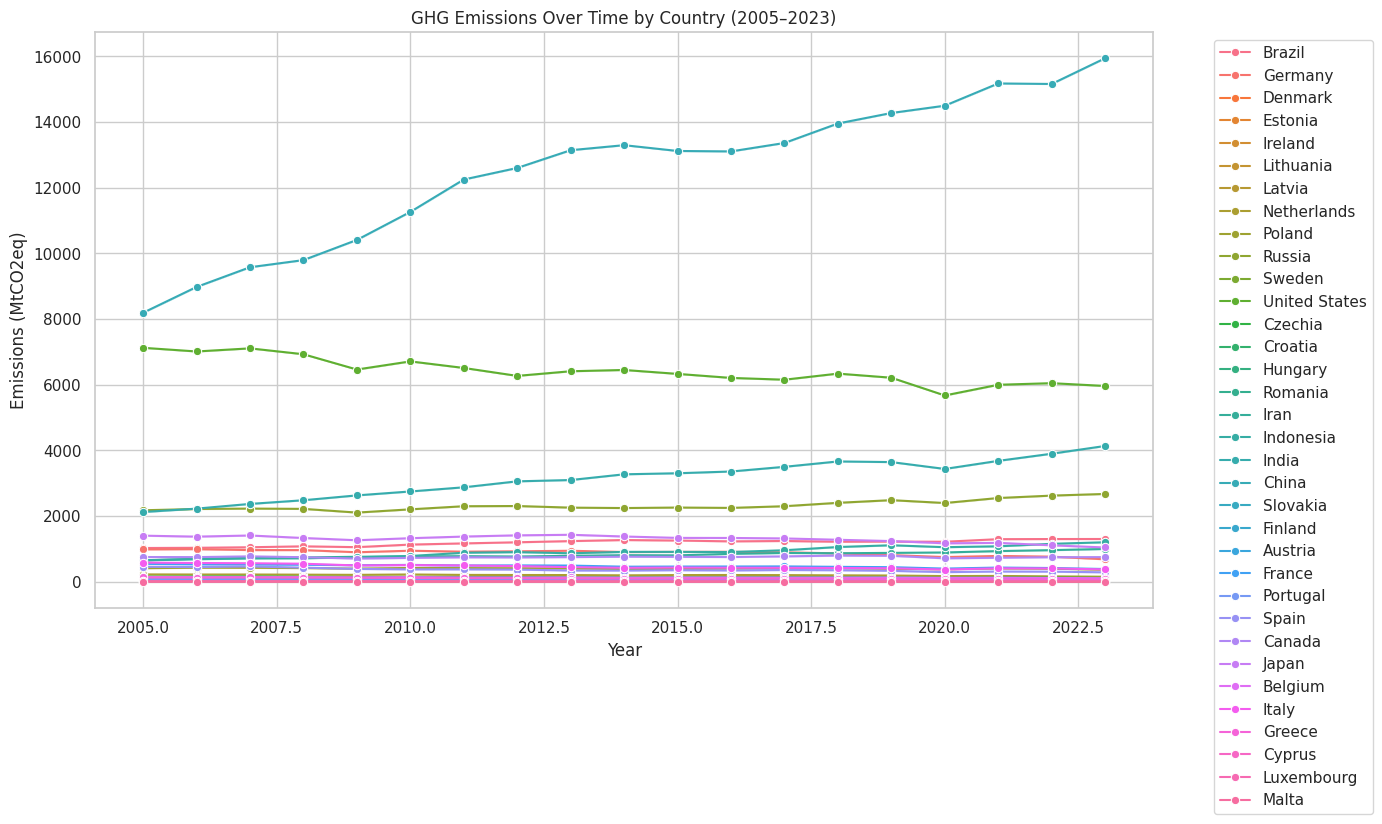

In [129]:
#Timeseries

# Step 1: Identify year columns as integers
year_columns = list(range(2005, 2024))  # integers, not strings

# Step 2: Melt the DataFrame
id_vars = ["Country", "Year", "Disaster Type", "Total Deaths", "Total Affected"]
df_ghg_long = df_total_ts_merge.melt(
    id_vars=id_vars,
    value_vars=year_columns,
    var_name="GHG Year",
    value_name="GHG Emissions (MtCO2eq)"
)

# Step 3: Ensure Year is integer (if needed)
df_ghg_long["Year"] = df_ghg_long["Year"].astype(int)

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_ghg_long, x="GHG Year", y="GHG Emissions (MtCO2eq)", hue="Country", marker='o')
plt.title("GHG Emissions Over Time by Country (2005–2023)")
plt.ylabel("Emissions (MtCO2eq)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

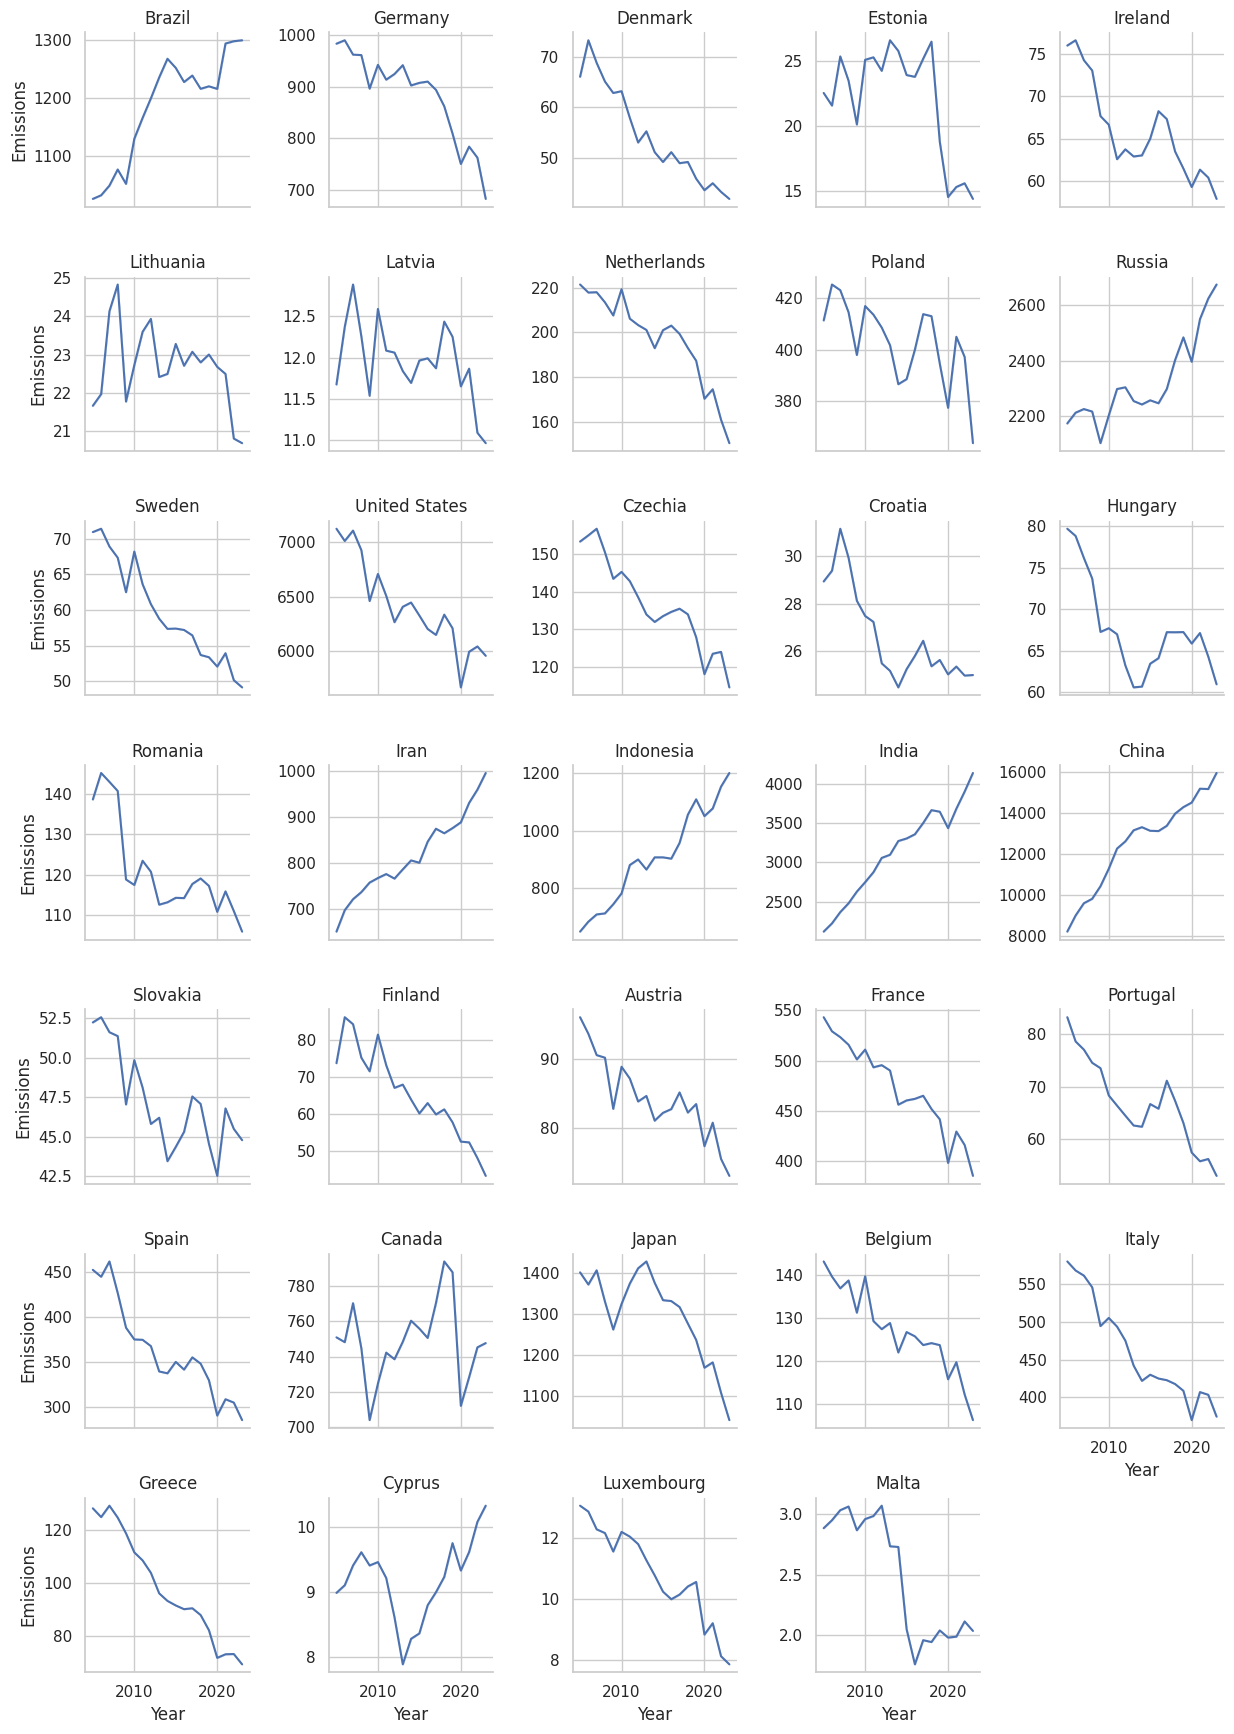

In [130]:
# Subplots
g = sns.FacetGrid(df_ghg_long, col="Country", col_wrap=5, height=2.5, sharey=False)
g.map_dataframe(sns.lineplot, x="GHG Year", y="GHG Emissions (MtCO2eq)")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Emissions")
g.tight_layout()
plt.show()


In [131]:
# Interactive One
fig = px.line(
    df_ghg_long,
    x="GHG Year",
    y="GHG Emissions (MtCO2eq)",
    color="Country",
    line_group="Country",
    title="GHG Emissions Over Time by Country (2005–2023)",
)
fig.update_layout(showlegend=True)
fig.show()


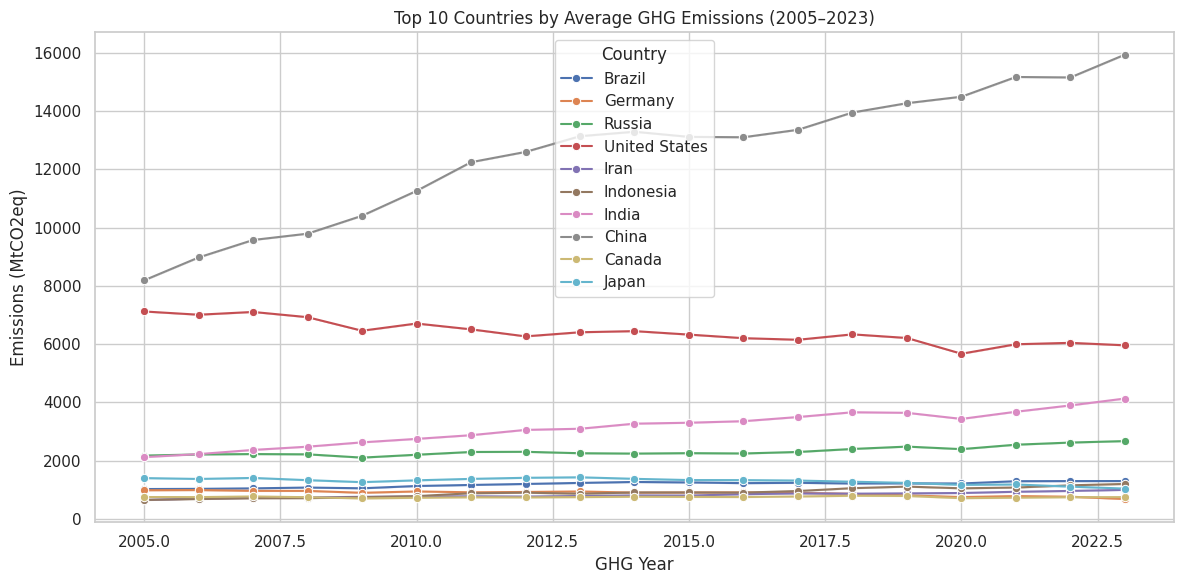

In [132]:
# Get top 10 average emitters
top_emitters = df_ghg_long.groupby("Country")["GHG Emissions (MtCO2eq)"].mean().nlargest(10).index

# Filter
df_top = df_ghg_long[df_ghg_long["Country"].isin(top_emitters)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x="GHG Year", y="GHG Emissions (MtCO2eq)", hue="Country", marker="o")
plt.title("Top 10 Countries by Average GHG Emissions (2005–2023)")
plt.ylabel("Emissions (MtCO2eq)")
plt.tight_layout()
plt.show()


None of the EUs are there.

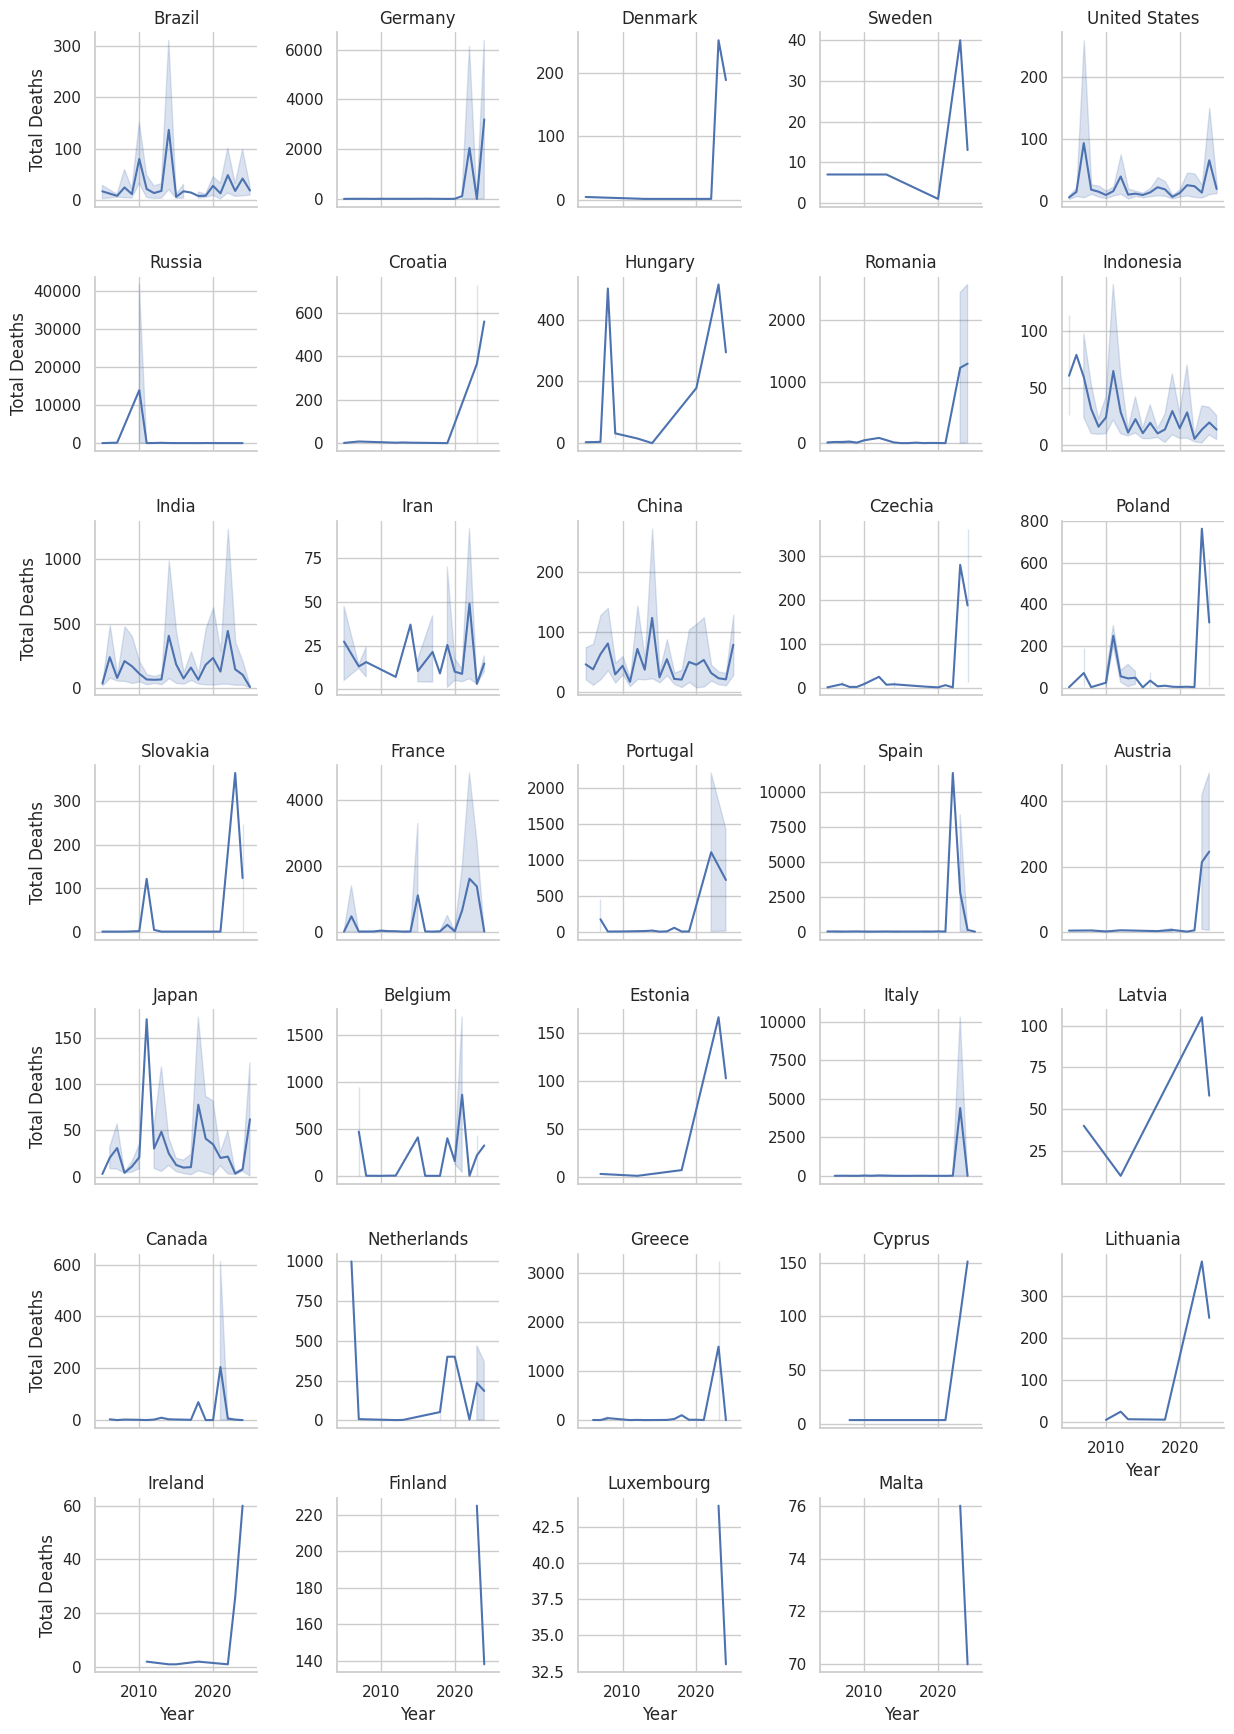

In [137]:
# Step 1: Filter out rows with missing death data (optional but helps clean)
df_death_timeseries = df_total_ts_merge.dropna(subset=["Total Deaths"])

# Step 2: Create FacetGrid
g = sns.FacetGrid(df_death_timeseries, col="Country", col_wrap=5, height=2.5, sharey=False)

# Step 3: Plot death count over years
g.map_dataframe(sns.lineplot, x="Year", y="Total Deaths")

# Step 4: Label and layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Total Deaths")
g.tight_layout()
plt.show()


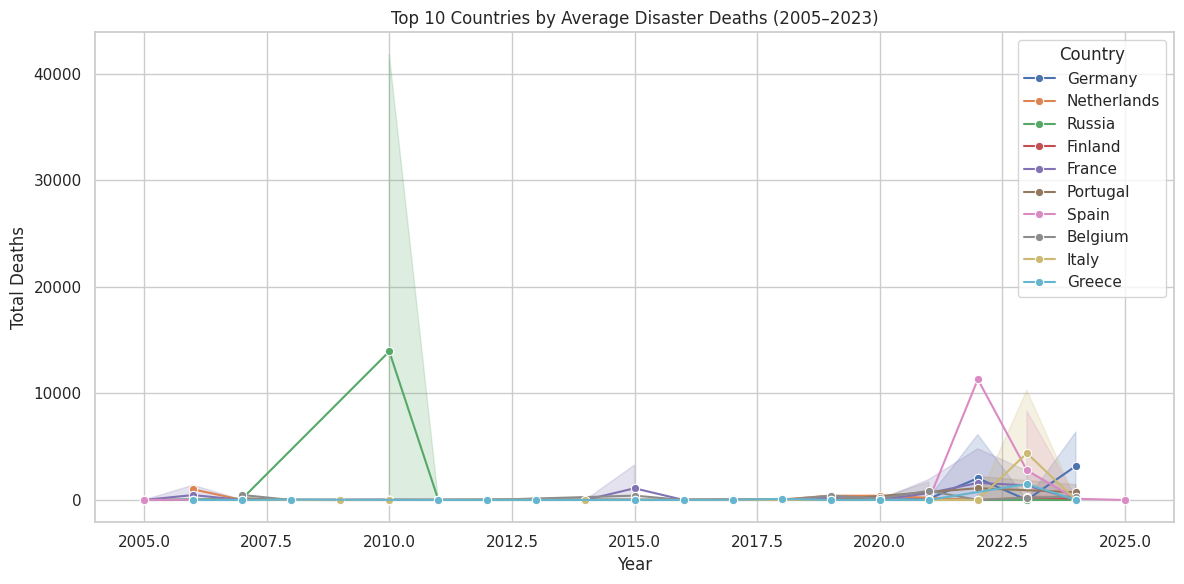

In [138]:
# Top 10 by average deaths
top_deaths = df_total_ts_merge.groupby("Country")["Total Deaths"].mean().nlargest(10).index
df_top_deaths = df_total_ts_merge[df_total_ts_merge["Country"].isin(top_deaths)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_deaths,
    x="Year", y="Total Deaths", hue="Country", marker="o"
)
plt.title("Top 10 Countries by Average Disaster Deaths (2005–2023)")
plt.ylabel("Total Deaths")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [140]:
# Interactive One
fig = px.line(
    df_ghg_long,
    x="Year",
    y="Total Deaths",
    color="Country",
    line_group="Country",
    title="Total Deaths by Disaster Timeseries",
)
fig.update_layout(showlegend=True)
fig.show()


## **bold text**